# **Import Modules**

In [1]:
import os
import sys

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
#define path
sys.path.append(os.path.abspath(os.path.join('..')))

#import custom modules
from scripts.Model import RegressionModelEvaluator

# **Load Data**

In [3]:
#define df path
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed_data_with_metrics.csv')
#plot_folder = os.path.join(os.path.dirname(os.getcwd()), 'plot images/model')

# **Evaluate Model**

## *Total Claims*

In [4]:
#load model
model=RegressionModelEvaluator(data_path, 'TotalClaims')

Data loaded and processed successfully.

Training data shape: (305141, 11)
Test data shape: (76286, 11)


In [5]:
#add different regression models
model.add_model('Linear Regression', LinearRegression())
model.add_model('Decision Tree Regressor', DecisionTreeRegressor(random_state=42))
model.add_model('Random Forest Regressor', RandomForestRegressor(random_state=42))
model.add_model('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42))

In [6]:
#train all added models
model.train_models()


Training Linear Regression...
Linear Regression trained.

Training Decision Tree Regressor...
Decision Tree Regressor trained.

Training Random Forest Regressor...
Random Forest Regressor trained.

Training Gradient Boosting Regressor...
Gradient Boosting Regressor trained.


In [7]:
#evaluate all trained models and get results
evaluation_results = model.evaluate_models()

#print the evaluation results
print("\n--- Model Evaluation Results ---")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")


 Evaluating Linear Regression...
Linear Regression - MSE: 73.1560, R-squared: -0.0004

 Evaluating Decision Tree Regressor...
Decision Tree Regressor - MSE: 0.0000, R-squared: 1.0000

 Evaluating Random Forest Regressor...
Random Forest Regressor - MSE: 0.0023, R-squared: 1.0000

 Evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - MSE: 0.0132, R-squared: 0.9998

--- Model Evaluation Results ---
Linear Regression:
  MSE: 73.1560
  R-squared: -0.0004
Decision Tree Regressor:
  MSE: 0.0000
  R-squared: 1.0000
Random Forest Regressor:
  MSE: 0.0023
  R-squared: 1.0000
Gradient Boosting Regressor:
  MSE: 0.0132
  R-squared: 0.9998



--- Generating SHAP Summary Plot for Linear Regression ---


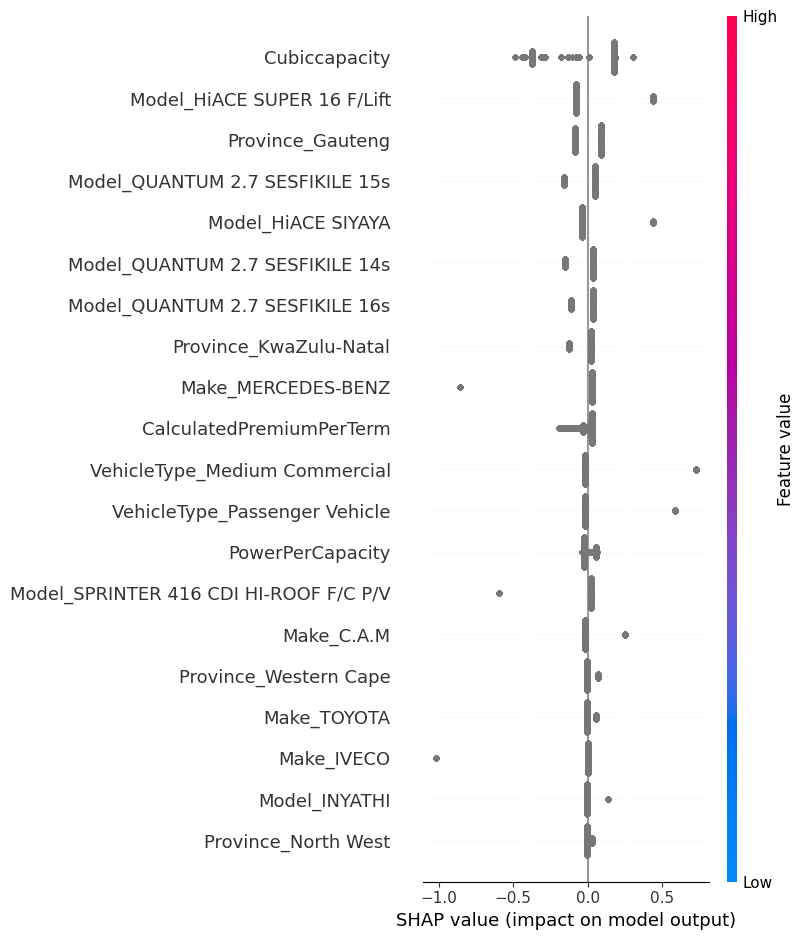


--- Generating SHAP Summary Plot for Gradient Boosting Regressor ---
Could not generate SHAP plot for Gradient Boosting Regressor: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with casting rule 'same_kind'

--- Generating SHAP Summary Plot for Random Forest Regressor ---
Could not generate SHAP plot for Random Forest Regressor: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with casting rule 'same_kind'


In [8]:
#generate SHAP summary plots for models
model.plot_shap_summary('Linear Regression')
model.plot_shap_summary('Gradient Boosting Regressor')
model.plot_shap_summary('Random Forest Regressor')

In [9]:
# Generate LIME explanations for a specific instance for some models
model.plot_lime_explanation('Linear Regression', instance_index=0)
model.plot_lime_explanation('Random Forest Regressor', instance_index=1)
model.plot_lime_explanation('Gradient Boosting Regressor', instance_index=2)


--- Generating LIME Explanation for Linear Regression (Instance Index 0) ---
Could not generate LIME explanation for Linear Regression: could not convert string to float: 'Passenger Vehicle'

--- Generating LIME Explanation for Random Forest Regressor (Instance Index 1) ---
Could not generate LIME explanation for Random Forest Regressor: could not convert string to float: 'Passenger Vehicle'

--- Generating LIME Explanation for Gradient Boosting Regressor (Instance Index 2) ---
Could not generate LIME explanation for Gradient Boosting Regressor: could not convert string to float: 'Passenger Vehicle'
